<a href="https://colab.research.google.com/github/faizanali02/googlecolab/blob/main/AI_Lab03_233574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lab 03: Agents in Artificial Intelligence
# ------------------------------------------
# Tools: Python 3.x
# Environment: Jupyter Notebook / Google Colab
# Libraries: random, optional matplotlib

import random

# ----------------------------------------------------
# Activity 1: PEAS for Vacuum Cleaner Agent
# Performance: % of tiles cleaned in minimum steps
# Environment: Grid of clean/dirty tiles
# Actuators: Left, Right, Up, Down, Suck
# Sensors: Current location & tile status
# ----------------------------------------------------

In [2]:
# Activity 2: Random Vacuum Agent
def RandomVacuumAgent():
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)

print("Activity 2: Random Agent Test")
for i in range(5):
    print("Step", i+1, "->", RandomVacuumAgent())
print("-"*50)

# ----------------------------------------------------

Activity 2: Random Agent Test
Step 1 -> Suck
Step 2 -> Left
Step 3 -> Right
Step 4 -> Right
Step 5 -> NoOp
--------------------------------------------------


In [3]:
# Activity 3: Reflex Vacuum Agent
def ReflexVacuumAgent(location, status):
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

print("Activity 3: Reflex Agent Test")
print("Test 1:", ReflexVacuumAgent('A', 'Dirty'))  # Expect: Suck
print("Test 2:", ReflexVacuumAgent('A', 'Clean'))  # Expect: Right
print("Test 3:", ReflexVacuumAgent('B', 'Clean'))  # Expect: Left
print("-"*50)

# ----------------------------------------------------

Activity 3: Reflex Agent Test
Test 1: Suck
Test 2: Right
Test 3: Left
--------------------------------------------------


In [4]:
# Activity 4: Model-based Agent
def ModelVacuumAgent(model, location, status):
    model[location] = status
    if all(state == 'Clean' for state in model.values()):
        return 'NoOp'
    elif status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

print("Activity 4: Model-based Agent Test")
model = {'A': None, 'B': None}
print("Test 1:", ModelVacuumAgent(model, 'A', 'Dirty'))
print("Test 2:", ModelVacuumAgent(model, 'B', 'Dirty'))
print("Test 3:", ModelVacuumAgent(model, 'A', 'Clean'))
print("Test 4:", ModelVacuumAgent(model, 'B', 'Clean'))
print("Test 5:", ModelVacuumAgent({'A':'Clean','B':'Clean'}, 'A', 'Clean'))
print("-"*50)

# ----------------------------------------------------

Activity 4: Model-based Agent Test
Test 1: Suck
Test 2: Suck
Test 3: Right
Test 4: NoOp
Test 5: NoOp
--------------------------------------------------


In [5]:
# Activity 5: Goal-based Agent
def GoalBasedVacuumAgent(room, location):
    while 'Dirty' in room.values():
        if room[location] == 'Dirty':
            room[location] = 'Clean'
            print(location, ": Suck")
        location = 'B' if location == 'A' else 'A'
    print("Goal achieved! Room is clean.")

print("Activity 5: Goal-based Agent Test")
room = {'A': 'Dirty', 'B': 'Clean'}
GoalBasedVacuumAgent(room, 'A')
print("-"*50)

# ----------------------------------------------------

Activity 5: Goal-based Agent Test
A : Suck
Goal achieved! Room is clean.
--------------------------------------------------


In [6]:
# Activity 6: Utility-based Agent
def UtilityBasedAgent(location, status, steps):
    utility = 0
    if status == 'Dirty':
        utility += 10
        return 'Suck', utility - steps
    else:
        return 'Move', utility - steps

print("Activity 6: Utility-based Agent Test")
print("Test 1:", UtilityBasedAgent('A', 'Dirty', 3))  # Expect: ('Suck', 7)
print("Test 2:", UtilityBasedAgent('B', 'Clean', 2))  # Expect: ('Move', -2)
print("-"*50)

# ----------------------------------------------------

Activity 6: Utility-based Agent Test
Test 1: ('Suck', 7)
Test 2: ('Move', -2)
--------------------------------------------------


In [7]:
# Activity 7: Table-driven Agent
def TableDrivenVacuumAgent(percepts):
    table = {
        (('A','Clean'),): 'Right',
        (('A','Dirty'),): 'Suck',
        (('B','Dirty'),): 'Suck'
    }
    return table.get(percepts, 'NoOp')

print("Activity 7: Table-driven Agent Test")
print("Test 1:", TableDrivenVacuumAgent((('A','Dirty'),)))  # Expect: Suck
print("Test 2:", TableDrivenVacuumAgent((('A','Clean'),)))  # Expect: Right
print("Test 3:", TableDrivenVacuumAgent((('B','Dirty'),)))  # Expect: Suck
print("Test 4:", TableDrivenVacuumAgent((('B','Clean'),)))  # Expect: NoOp
print("-"*50)

# ----------------------------------------------------

Activity 7: Table-driven Agent Test
Test 1: Suck
Test 2: Right
Test 3: Suck
Test 4: NoOp
--------------------------------------------------


In [8]:
# Activity 8: Environment Simulator
room = {'A': 'Dirty', 'B': 'Dirty'}

def run(agent):
    for loc in list(room.keys()):
        action = agent(loc, room[loc])
        print(f"At {loc} -> {action}")
        if action == 'Suck':
            room[loc] = 'Clean'

print("Activity 8: Run Reflex Agent in Environment")
run(ReflexVacuumAgent)
print("Room after simulation:", room)
print("-"*50)

# ----------------------------------------------------

Activity 8: Run Reflex Agent in Environment
At A -> Suck
At B -> Suck
Room after simulation: {'A': 'Clean', 'B': 'Clean'}
--------------------------------------------------


In [9]:
# Activity 9: Performance Comparison Random vs Reflex
def RandomVacuumAgent2(location, status):
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)

def ReflexVacuumAgent2(location, status):
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

def run_eval(agent):
    room = {'A': 'Dirty', 'B': 'Dirty'}
    for loc in list(room.keys()):
        action = agent(loc, room[loc])
        if action == 'Suck':
            room[loc] = 'Clean'
    cleaned = sum(1 for state in room.values() if state == 'Clean')
    return cleaned

print("Activity 9: Performance")
print("Random Agent cleaned", run_eval(RandomVacuumAgent2), "/2 tiles")
print("Reflex Agent cleaned", run_eval(ReflexVacuumAgent2), "/2 tiles")
print("-"*50)

# ----------------------------------------------------

Activity 9: Performance
Random Agent cleaned 0 /2 tiles
Reflex Agent cleaned 2 /2 tiles
--------------------------------------------------


In [10]:
# Fixed Activity 10: Comparative Analysis (All Agents)
import random
import copy

# -----------------------------
# Agent implementations
# All agents use a consistent interface in the simulator:
#   action = agent_func(location, room, model, steps)
# model may be None for agents that don't use it.
# -----------------------------

def RandomVacuumAgent(location, room, model=None, steps=0):
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)

def ReflexVacuumAgent(location, room, model=None, steps=0):
    status = room[location]
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

def ModelVacuumAgent(location, room, model, steps=0):
    # model is a dict {'A':..., 'B':...}
    model[location] = room[location]
    if all(state == 'Clean' for state in model.values()):
        return 'NoOp'
    elif room[location] == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

def GoalBasedVacuumAgent(location, room, model=None, steps=0):
    # Goal-based: if current tile dirty -> Suck; else move to other tile
    if room[location] == 'Dirty':
        return 'Suck'
    else:
        return 'Right' if location == 'A' else 'Left'

def UtilityVacuumAgent(location, room, model=None, steps=0):
    # Simple utility policy:
    # - If current tile is dirty => Suck (high utility)
    # - Otherwise, move to the other tile if it's dirty; else NoOp
    if room[location] == 'Dirty':
        return 'Suck'
    other = 'B' if location == 'A' else 'A'
    if room[other] == 'Dirty':
        return 'Right' if location == 'A' else 'Left'
    return 'NoOp'

# -----------------------------
# Simulator: run a single agent on a fresh room
# -----------------------------
def run_agent_once(agent_name, max_steps=10, verbose=False):
    initial_room = {'A': 'Dirty', 'B': 'Dirty'}
    room = copy.deepcopy(initial_room)
    location = 'A'                 # start location
    steps = 0
    model = {'A': None, 'B': None} # for model-based agent

    # Continue until either all clean or max_steps reached
    while steps < max_steps and 'Dirty' in room.values():
        if agent_name == "Random":
            action = RandomVacuumAgent(location, room, model, steps)
        elif agent_name == "Reflex":
            action = ReflexVacuumAgent(location, room, model, steps)
        elif agent_name == "Model":
            action = ModelVacuumAgent(location, room, model, steps)
        elif agent_name == "Goal":
            action = GoalBasedVacuumAgent(location, room, model, steps)
        elif agent_name == "Utility":
            action = UtilityVacuumAgent(location, room, model, steps)
        else:
            raise ValueError("Unknown agent: " + str(agent_name))

        steps += 1

        # Apply action to environment
        if action == 'Suck':
            room[location] = 'Clean'
            if verbose: print(f"Step {steps}: {agent_name} -> Suck at {location}")
        elif action == 'Right':
            if location == 'A':
                location = 'B'
            if verbose: print(f"Step {steps}: {agent_name} -> Move Right to {location}")
        elif action == 'Left':
            if location == 'B':
                location = 'A'
            if verbose: print(f"Step {steps}: {agent_name} -> Move Left to {location}")
        elif action == 'NoOp':
            if verbose: print(f"Step {steps}: {agent_name} -> NoOp (doing nothing)")
        else:
            if verbose: print(f"Step {steps}: {agent_name} -> Unknown action '{action}' (treated as NoOp)")

    cleaned = sum(1 for v in room.values() if v == 'Clean')
    return {
        "Agent": f"{agent_name} Agent",
        "Tiles Cleaned": f"{int((cleaned/2)*100)}%",
        "Steps": steps,
        "Rational?": "Yes" if cleaned == 2 else ("Partial" if cleaned == 1 else "No")
    }

# -----------------------------
# Run comparison for all agents
# -----------------------------
agents = ["Random", "Reflex", "Model", "Goal", "Utility"]
results = [run_agent_once(a) for a in agents]

# Print table
print("Agent Type\t\tTiles Cleaned\tSteps\tRational?")
print("-"*60)
for r in results:
    print(f"{r['Agent']:<16}\t{r['Tiles Cleaned']:<12}\t{r['Steps']:<5}\t{r['Rational?']}")


Agent Type		Tiles Cleaned	Steps	Rational?
------------------------------------------------------------
Random Agent    	50%         	10   	Partial
Reflex Agent    	100%        	3    	Yes
Model Agent     	100%        	3    	Yes
Goal Agent      	100%        	3    	Yes
Utility Agent   	100%        	3    	Yes


Path found by Goal-based Agent: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 5)]


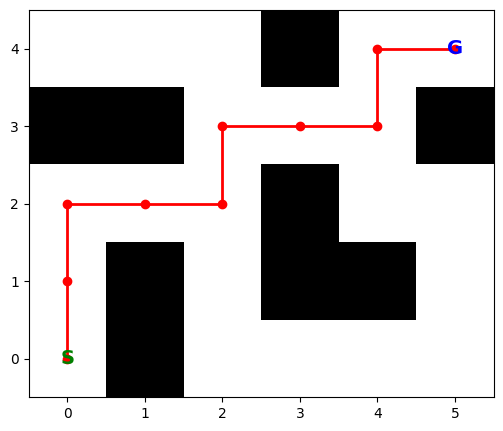

In [1]:
# Maze Solver Agent (Goal-based)

from collections import deque
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Define Maze
# 0 = Free space
# 1 = Wall
# S = Start
# G = Goal
# ---------------------------
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0],
]

start = (0, 0)   # Top-left corner
goal  = (4, 5)   # Bottom-right corner

rows, cols = len(maze), len(maze[0])

# ---------------------------
# 2. Goal-based Agent (BFS)
# ---------------------------
def bfs(start, goal):
    queue = deque([(start, [start])])  # (current, path)
    visited = set([start])

    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == goal:
            return path  # Found goal

        # possible moves (up, down, left, right)
        moves = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0 and (nx, ny) not in visited:
                queue.append(((nx, ny), path + [(nx, ny)]))
                visited.add((nx, ny))
    return None

path = bfs(start, goal)
print("Path found by Goal-based Agent:", path)

# ---------------------------
# 3. Visualization
# ---------------------------
def draw_maze(maze, path):
    grid = np.array(maze)
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap="binary")  # black=wall, white=free

    # Mark path
    if path:
        px, py = zip(*path)
        plt.plot(py, px, color="red", linewidth=2, marker="o")

    # Mark start and goal
    plt.text(start[1], start[0], 'S', ha='center', va='center', color="green", fontsize=14, fontweight="bold")
    plt.text(goal[1], goal[0], 'G', ha='center', va='center', color="blue", fontsize=14, fontweight="bold")

    plt.gca().invert_yaxis()
    plt.show()

draw_maze(maze, path)
